## Data Collection

You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model. In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

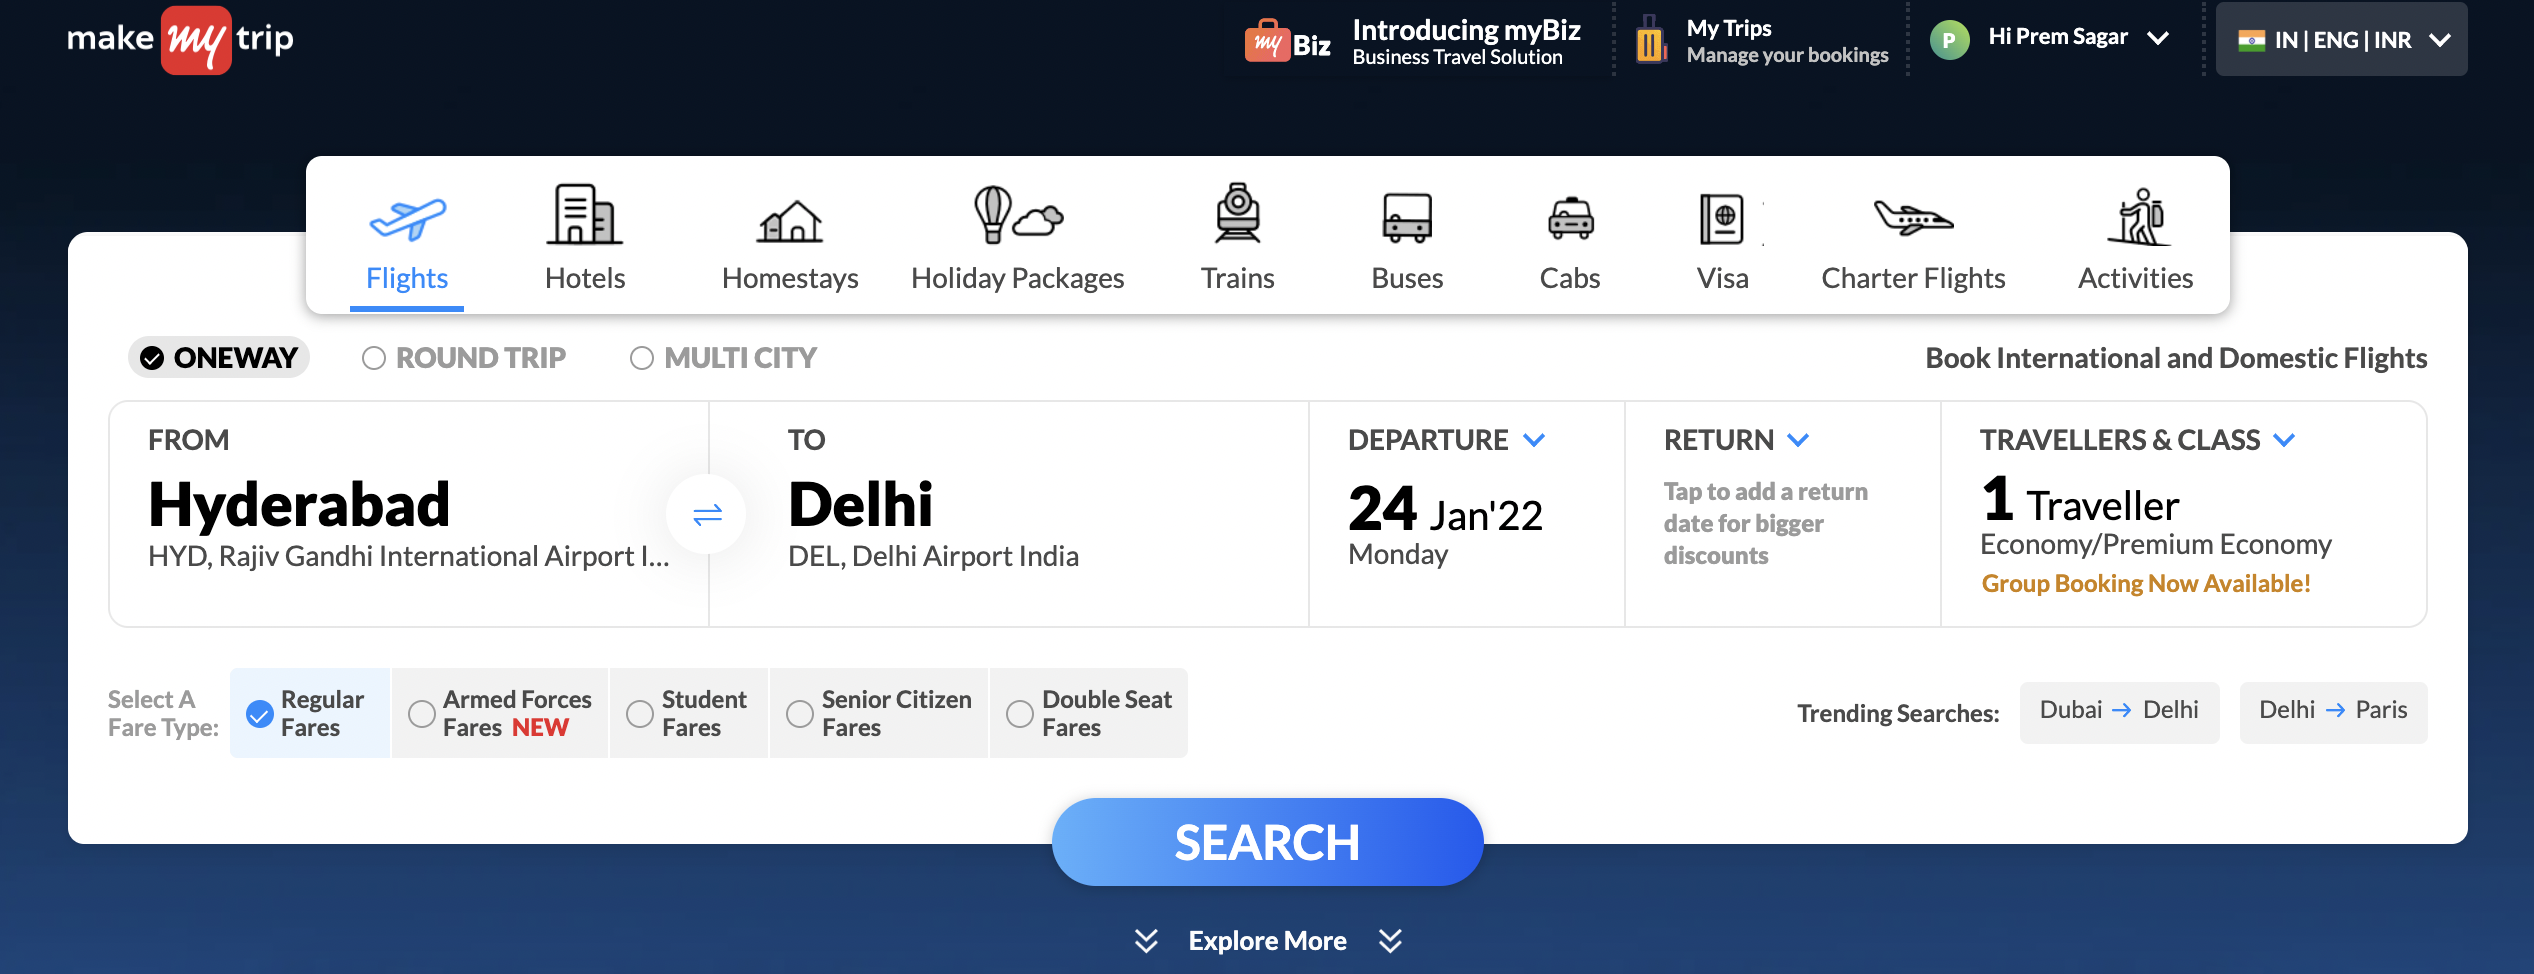

In [74]:
#importing required libraries
import selenium
from selenium import webdriver as wb
import pandas as pd
import numpy as np
import datetime
import time
from datetime import date
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By


from bs4 import BeautifulSoup
from urllib.parse import urljoin
from selenium.webdriver.common.by import By

from selenium.common.exceptions import TimeoutException, StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

import requests

import time, sys
import datetime
import tqdm.notebook as tqdm


import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [126]:
#driver
driver = wb.Chrome(r"../FLIGHT PRICE PREDICTION_PROJECT/Web scraping/chromedriver")

In [76]:
month = [1,1,1,1,1,1,1]
month = [str(x).zfill(2) for x in month]
day = [25,26,27,28,29,30]
day = [str(x).zfill(2) for x in day]
year = [2022,2022,2022,2022,2022,2022,2022]
year = [str(x).zfill(4) for x in year]

In [77]:
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=DEL-BOM-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))

In [78]:
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(1)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True

In [79]:
#Creating Empty list

Airline_Names=[]
Departure_Arrival=[]
Flight_Duration=[]
Places=[]
Meal_Availability=[]
Number_Of_Stops=[]
Flight_Prices=[]

## Data collection: delhi to mumbai 
dates : 25,26,27,28,29,30 January 2022

In [80]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=DEL-BOM-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection : Hyderabad to Pune
Dates: 25,26,27,28,29,30 January 2022

In [81]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=HYD-PNQ-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection : chennai to bangalore
Dates: 25,26,27,28,29,30 January 2022

In [82]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=MAA-BLR-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection : Bangalore to Pune
Dates: 25,26,27,28,29,30 January 2022

In [83]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=BLR-PNQ-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection : Indore to Delhi
Dates: 25,26,27,28,29,30 January 2022

In [84]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=IDR-DEL-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection : Tiruvanathpuram to Kolkota
Dates: 25,26,27,28,29,30 January 2022

In [86]:
# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=TRV-CCU-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data Collection: Bangalore to Hyderabad
Dates: 25,26,27,28,29,30 January 2022

In [100]:
# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=BLR-HYD-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data Collection: Hyderabad to kolkota
Dates: 25,26,27,28,29,30 January 2022

In [101]:
# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=HYD-CCU-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection: mumbai to delhi
dates : 25,26,27,28,29,30 January 2022

In [104]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=BOM-DEL-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection :  Pune to Bangalore
Dates: 25,26,27,28,29,30 January 2022

In [105]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=PNQ-BLR-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

## Data collection : Delhi to Indore
Dates: 25,26,27,28,29,30 January 2022

In [106]:

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=DEL-IDR-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)

    # airline names
    try:
        F_Names= driver.find_elements_by_xpath('//span[@class="boldFont blackText airlineName"]')
        for i in F_Names:
            Airline_Names.append(i.text)
    except NoSuchElementException:
        Airline_Names.append('-')
        
    # Departure_Time    
    try:
        time_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont appendBottom2 makeFlex hrtlCenter"]/span')
        for i in time_1:
            Departure_Arrival.append(i.text)
    except NoSuchElementException:
        Departure_Arrival.append('-')

    # Flight_Duration  
    try:
        Flight_Duration_1 = driver.find_elements_by_xpath('//div [@class="stop-info flexOne"]/p')
        for i in Flight_Duration_1:
            Flight_Duration.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Flight_Duration.append('-')

    # Source & Destination 
    try:
        Place_1 = driver.find_elements_by_xpath('//p [@class="darkText"]')
        for i in Place_1:
            Places.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Places.append('-')

    #Number_Of_Stops
    try:
        Number_Of_Stops_1 = driver.find_elements_by_xpath('//p[@class="flightsLayoverInfo"]')
        for i in Number_Of_Stops_1:
            Number_Of_Stops.append(i.text)
    except NoSuchElementException: #handling no such element exception
        Number_Of_Stops.append('-')


    #Flight_Prices
    try:    
        Flight_Prices_1 = driver.find_elements_by_xpath('//p[@class="blackText fontSize18 blackFont white-space-no-wrap"]')
        for i in Flight_Prices_1:
            Flight_Prices.append(i.text.replace('₹', ''))
    except NoSuchElementException: #handling no such element exception
        Flight_Prices.append('-')
        

In [124]:
#close browser
driver.close()

In [107]:
len(Airline_Names),len(Departure_Arrival),len(Flight_Duration),len(Places),len(Number_Of_Stops),len(Flight_Prices)

(1829, 3658, 1829, 3658, 1829, 1829)

In [108]:
Departure_Arrival

['02:00',
 '04:15',
 '08:00',
 '10:10',
 '10:30',
 '12:50',
 '12:45',
 '15:00',
 '14:20',
 '16:35',
 '18:05',
 '20:25',
 '19:40',
 '21:55',
 '21:00',
 '23:15',
 '22:30',
 '00:40',
 '06:05',
 '12:30',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '06:20',
 '08:40',
 '07:00',
 '09:05',
 '08:00',
 '10:10',
 '08:45',
 '11:05',
 '09:00',
 '11:15',
 '14:20',
 '16:35',
 '17:15',
 '19:25',
 '18:00',
 '20:00',
 '18:40',
 '20:50',
 '19:00',
 '21:15',
 '20:00',
 '22:10',
 '20:30',
 '22:50',
 '21:15',
 '23:30',
 '07:45',
 '12:00',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '05:45',
 '07:55',
 '07:30',
 '09:45',
 '09:30',
 '11:35',
 '12:50',
 '15:00',
 '14:20',
 '16:30',
 '15:30',
 '17:40',
 '16:45',
 '19:05',
 '17:45',
 '20:05',
 '19:50',
 '22:00',
 '21:40',
 '23:50',
 '13:15',
 '17:50',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '02:00',
 '04:15',
 '08:00',


In [119]:
# seperating --> departure_arrival column have both data departure and arrival timings

Departure_time = Departure_Arrival[0::2]
Arrival_time = Departure_Arrival[1::2]

print(len(Departure_time),len(Arrival_time))

1829 1829


In [120]:
Places

['New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New Delhi',
 'Mumbai',
 'New

In [121]:
# seperating--> Places column have both data deprature and arrival locations

Departure_place = Places[0::2]
Arrival_place = Places[1::2]

print(len(Departure_place),len(Arrival_place))

1829 1829


### Finally, collected more than 1500 data rows. This data is sufficient.

In [125]:
#lets save them to csv file using creating --> dataframe.

makeMyTrip= pd.DataFrame()

makeMyTrip['Airline_Names'] = Airline_Names
makeMyTrip['Departure_time']= Departure_time
makeMyTrip['Arrival_time']= Arrival_time
makeMyTrip['Flight_Duration']= Flight_Duration
makeMyTrip['Source_Place']= Departure_place
makeMyTrip['Destination_Place']= Arrival_place
makeMyTrip['Number_Of_Stops']= Number_Of_Stops
makeMyTrip['Flight_Prices']= Flight_Prices

makeMyTrip

,Airline_Names,Departure_time,Arrival_time,Flight_Duration,Source_Place,Destination_Place,Number_Of_Stops,Flight_Prices
0,Go First,02:00,04:15,02 h 15 m,New Delhi,Mumbai,Non stop,"5,954"
1,Go First,08:00,10:10,02 h 10 m,New Delhi,Mumbai,Non stop,"5,954"
2,Go First,10:30,12:50,02 h 20 m,New Delhi,Mumbai,Non stop,"5,954"
3,Go First,12:45,15:00,02 h 15 m,New Delhi,Mumbai,Non stop,"5,954"
4,Go First,14:20,16:35,02 h 15 m,New Delhi,Mumbai,Non stop,"5,954"
...,...,...,...,...,...,...,...,...
1824,,,,,,,,
1825,,,,,,,,
1826,,,,,,,,
1827,,,,,,,,


In [127]:
makeMyTrip.to_csv("makeMyTrip.csv")